In [105]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import image
import os

from astropy.io import fits
from astropy.table import Table, Column
from astropy.coordinates import Angle, SkyCoord
from astropy.visualization import hist
from astropy import units as u

import subprocess
import cosmics
import shlex

from IPython import display
import time

from scipy.optimize import curve_fit

%matplotlib inline

In [25]:
cluster=Table.read('/Users/taweewat/Downloads/redmapper_dr8_public_v6.3_catalog.fits')
member=Table.read('/Users/taweewat/Downloads/redmapper_dr8_public_v6.3_members.fits')
mask=Table.read('/Users/taweewat/Downloads/redmapper_dr8_public_v6.3_zmask.fits')


In [65]:
dff=pd.read_csv('/Users/taweewat/Documents/xray_project/ned-result/final_cut5.csv')
dff=dff[dff['followup']=='followed']

In [88]:
dff=pd.read_csv('/Users/taweewat/Documents/xray_project/ned-result/final_sdss_cut5.csv')
dff=dff[dff['followup']=='followed']

In [30]:
cluster.colnames

['ID',
 'NAME',
 'RA',
 'DEC',
 'Z_LAMBDA',
 'Z_LAMBDA_ERR',
 'LAMBDA',
 'LAMBDA_ERR',
 'S',
 'Z_SPEC',
 'OBJID',
 'IMAG',
 'IMAG_ERR',
 'MODEL_MAG_U',
 'MODEL_MAGERR_U',
 'MODEL_MAG_G',
 'MODEL_MAGERR_G',
 'MODEL_MAG_R',
 'MODEL_MAGERR_R',
 'MODEL_MAG_I',
 'MODEL_MAGERR_I',
 'MODEL_MAG_Z',
 'MODEL_MAGERR_Z',
 'ILUM',
 'P_CEN',
 'RA_CEN',
 'DEC_CEN',
 'ID_CEN',
 'PZBINS',
 'PZ']

In [89]:
c = SkyCoord(ra=dff['RA'].values*u.degree, dec=dff['DEC'].values*u.degree)  
catalog = SkyCoord(ra=cluster['RA']*u.degree, dec=cluster['DEC']*u.degree)  
idx, d2d, d3d = c.match_to_catalog_sky(catalog)  

(array([ 6.,  5.,  5.,  5.,  3.,  5.,  6.,  5.,  9.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

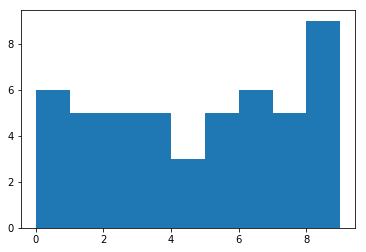

In [90]:
plt.hist(np.array([i.value for i in d2d.to(u.arcmin)]),bins=np.arange(0,10,1))

In [107]:
dffs=dff[np.array([i.value for i in d2d.to(u.arcmin)])<3]

In [108]:
knowns=cluster[idx[np.array([i.value for i in d2d.to(u.arcmin)])<3]]
aa=Column(dffs['name'].values, name='name')
knowns.add_column(aa, index=0)

In [109]:
knowns

name,ID,NAME,RA,DEC,Z_LAMBDA,Z_LAMBDA_ERR,LAMBDA,LAMBDA_ERR,S,Z_SPEC,OBJID,IMAG,IMAG_ERR,MODEL_MAG_U,MODEL_MAGERR_U,MODEL_MAG_G,MODEL_MAGERR_G,MODEL_MAG_R,MODEL_MAGERR_R,MODEL_MAG_I,MODEL_MAGERR_I,MODEL_MAG_Z,MODEL_MAGERR_Z,ILUM,P_CEN [5],RA_CEN [5],DEC_CEN [5],ID_CEN [5],PZBINS [21],PZ [21]
object,int32,str20,float64,float64,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32
SDSS069,12226,RMJ101429.4+310412.8,153.622613328,31.0702334418,0.273839,0.0113191,26.197,2.58835,1.01266,0.252419,1237665128532345091,0.0,0.0,25.5676,2.75921,19.6174,0.0324459,18.037,0.0145956,17.5021,0.0137683,17.3082,0.0461662,18.7116,0.921864 .. 1.30701e-05,153.623 .. 153.617,31.0702 .. 31.0444,32054432 .. 32054526,0.198039 .. 0.349639,1.9704e-13 .. 4.25127e-06
SDSS096,696,RMJ012141.4+200538.5,20.4224602711,20.094018337,0.194316,0.00501264,57.0273,3.02073,1.00013,0.182949,1237679461362958457,0.0,0.0,19.7296,0.109633,17.7363,0.00959367,16.4316,0.00489483,15.9318,0.00447137,15.5881,0.00807262,44.1826,0.994039 .. 1.51453e-06,20.4225 .. 20.4208,20.094 .. 20.0856,53950860 .. 53950895,0.163331 .. 0.225302,3.61536e-08 .. 8.92914e-06
SDSS116,1108,RMJ233023.0+203736.8,352.595684233,20.6268783268,0.165667,0.00414681,51.5355,3.08006,1.01082,-1.0,1237680247885136064,0.0,0.0,20.2385,0.352611,17.9852,0.0138379,16.7538,0.0083309,16.2734,0.00790906,15.9267,0.0188315,36.964,0.568329 .. 9.83513e-07,352.596 .. 352.708,20.6269 .. 20.6724,56202148 .. 56202161,0.141623 .. 0.18971,4.156e-06 .. 1.16143e-05
SDSS472,18584,RMJ090625.9+164628.7,136.608046026,16.7746375882,0.305893,0.0149631,21.7731,2.53785,0.994095,0.281724,1237667537464656253,0.0,0.0,22.9323,0.713665,20.634,0.0422434,18.9939,0.0158393,18.3587,0.0131255,17.9343,0.0314203,14.6514,0.8319 .. 0.00183201,136.608 .. 136.616,16.7746 .. 16.7763,38948816 .. 38948927,0.185062 .. 0.426724,6.84128e-24 .. 3.17597e-06
SDSS476,7903,RMJ091339.7+405653.9,138.415493345,40.9483076041,0.445715,0.0115883,55.8527,6.05421,1.3082,-1.0,1237657628440920725,0.0,0.0,24.1407,1.50673,21.7316,0.0953376,19.9299,0.031209,19.1833,0.023488,18.7374,0.0519191,33.5883,0.428026 .. 0.0101205,138.415 .. 138.401,40.9483 .. 40.9411,11259740 .. 11259716,0.378675 .. 0.512755,7.08238e-06 .. 3.72351e-06
SDSS501,667,RMJ102340.7+041115.1,155.919480706,4.1875151655,0.291733,0.0110694,73.5332,3.96297,0.996543,-1.0,1237654605323894994,0.0,0.0,23.5456,1.12008,20.7009,0.0479766,19.1188,0.0182602,18.5648,0.0149105,18.2085,0.0360947,41.4641,0.699742 .. 0.000840236,155.919 .. 155.894,4.18752 .. 4.19409,6338822 .. 6338976,0.22293 .. 0.360537,2.17844e-09 .. 4.34307e-06
SDSS507,1628,RMJ104045.4+395448.6,160.188960873,39.9134876199,0.143084,0.00420347,42.8402,2.58569,0.999808,0.13406,1237661383314702575,0.0,0.0,19.8934,0.0754875,17.9548,0.00783528,16.8857,0.00516167,16.443,0.00472252,16.0913,0.0106487,21.8957,0.793031 .. 7.4512e-05,160.189 .. 160.113,39.9135 .. 39.9933,18825022 .. 22581155,0.119574 .. 0.166594,2.87964e-05 .. 1.0316e-05
SDSS517,40821,RMJ105701.8+051547.6,164.257682856,5.26323310461,0.321441,0.0159302,20.3696,2.53333,0.997346,-1.0,1237654602106470666,0.0,0.0,21.8034,0.233326,20.2536,0.0316695,18.7157,0.0120643,18.1889,0.0113772,17.8992,0.0241449,13.467,0.962834 .. 4.89018e-05,164.258 .. 164.25,5.26323 .. 5.2719,6123388 .. 6123505,0.227147 .. 0.415735,1.98081e-09 .. 3.12474e-06
SDSS522,38088,RMJ110715.0+162934.3,166.812360887,16.4928483728,0.399493,0.0178181,28.3937,3.97257,1.13857,-1.0,1237668585432023336,0.0,0.0,24.0818,2.05948,20.734,0.0589457,19.1066,0.0229331,18.5042,0.0189435,18.2169,0.0558593,17.7225,0.516902 .. 0.0300727,166.812 .. 166.778,16.4928 .. 16.4883,43383309 .. 43383109,0.314972 .. 0.484014,0.00945996 .. 2.5481e-06


In [115]:
for i in range(4,10):
    print i

4
5
6
7
8
9
